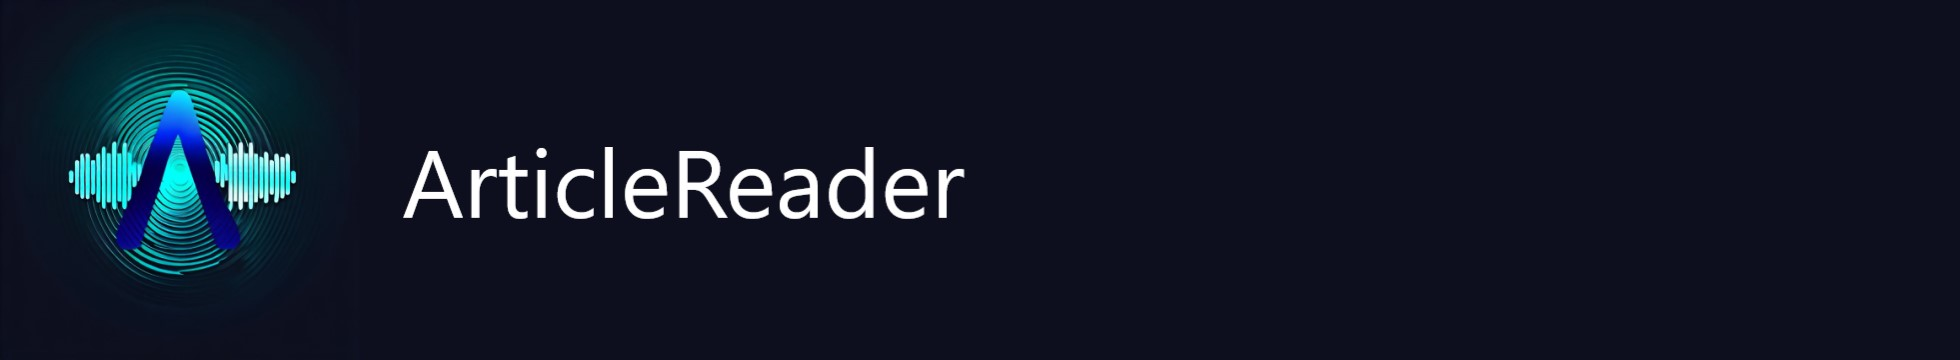

# **ArticleReader**

**Description:**

ArticleReader is a user-friendly script designed to streamline the process of extracting, analyzing, and presenting content from online articles in audio form. This script leverages several libraries and APIs to achieve its functionality.

**Usage:**
- Users can simply paste the URL of an article into "url" input form and select Run.
- After running the script, ArticleReader will display the article's content as a ready to play audio file for individuals who prefer listening to content over or along with reading.

**Note:**
- Depending on the article's length, the audio conversion process may take some time.
- gTTS may limit the number of runs a person may use in a particular sitting.

In [ ]:
#@title ArticleReader
url = "" # @param {type:"string"}

# Step 1: import/install necessary libraries
from IPython.display import display, Audio # for clearing output and displaying audio content
try:
    from newspaper import Article # Importing newspaper library for extracting articles
except ModuleNotFoundError: # install newspaper3k if module is not found, import module, and clear output
    !pip install newspaper3k
    from newspaper import Article
    from IPython import display
    display.clear_output()
try:
    from gtts import gTTS # Importing gTTS library for text-to-voice conversion
except ModuleNotFoundError: # install gTTS if module is not found, import module, and clear output
    !pip install gtts
    from gtts import gTTS
    from IPython import display
    display.clear_output()

# Step 2: Extract Article Content

# Initialize and parse the article
article = Article(url)
article.download()
article.parse()
article.text

# Store article content in variables
art_text = article.text # The main text content of the article
art_title = article.title # The title of the article
art_author = article.authors # The author(s) of the article

# Display article information
print(art_title)
print("Author:", article.authors)
print("Publication Date:", article.publish_date)

# Step 3: Convert Text to Audio
try:
    conv = gTTS(text=art_text, lang='en', slow=False)
    conv.save("audio.mp3") # Save the audio to a file
except requests.exceptions.HTTPError as e:
    print("An error occurred while generating audio:", str(e))

# Step 4: Display the Audio Player
from IPython.display import display, Audio # for clearing output and displaying audio content
audio = Audio('audio.mp3')
display(audio)